# BatchShape

In [9]:
from wholeslidedata.samplers.batchshape import BatchShape
from wholeslidedata.iterators import create_batch_iterator
from wholeslidedata.visualization.plotting import plot_batch

The [batchiterator user guide]() already showed how to specify a batchshape. This guide will show how to specify the batch shape to extract multiresolution batches

In [6]:
user_config = './configs/user_config_multiresolution.yml'
mode = 'training'
!cat {user_config}

wholeslidedata:
    default:
        yaml_source:
            training:
                - wsi: 
                    path: /tmp/TCGA-21-5784-01Z-00-DX1.tif
                  wsa: 
                    path: /tmp/TCGA-21-5784-01Z-00-DX1.xml       

        labels:
            stroma: 1
            tumor: 2
            lymphocytes: 3
            
        batch_shape:
            batch_size: 4
            spacing: [0.5, 4.0]
            shape: [[512, 512, 3],[512, 512, 3]]
            y_shape: [2,512,512]

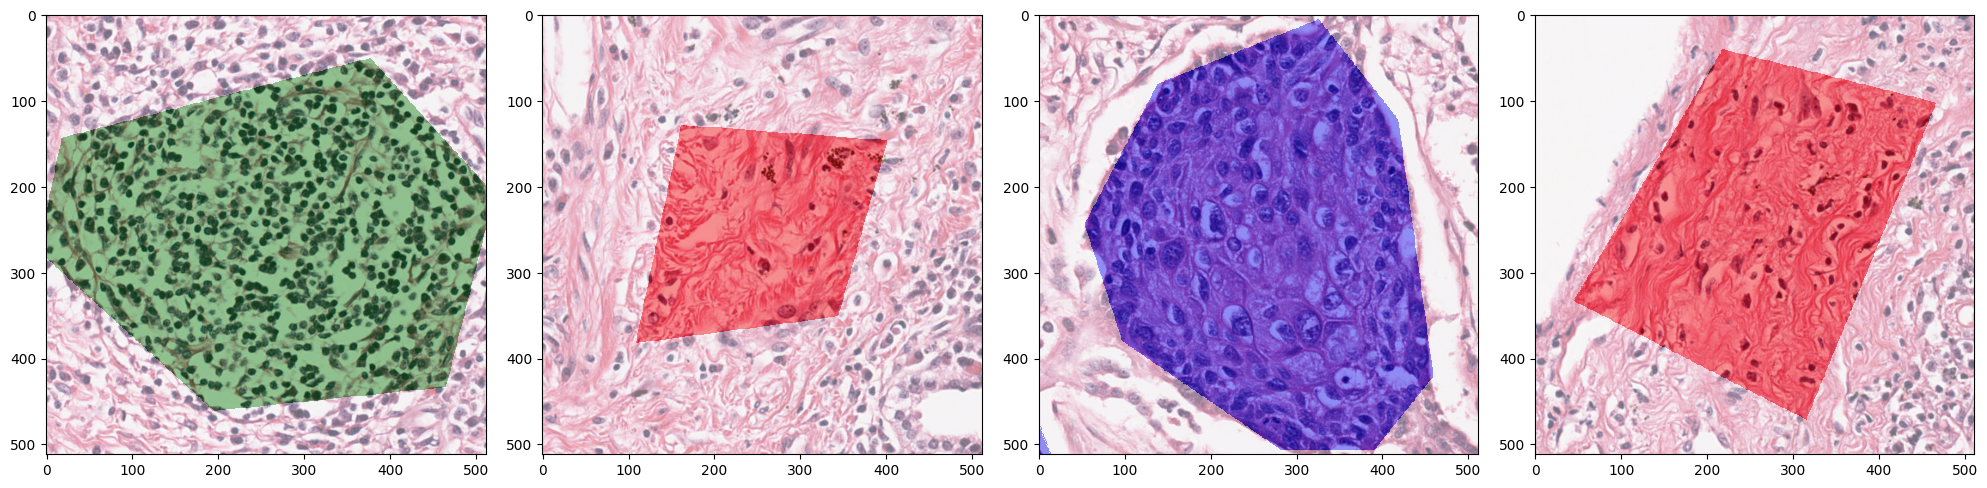

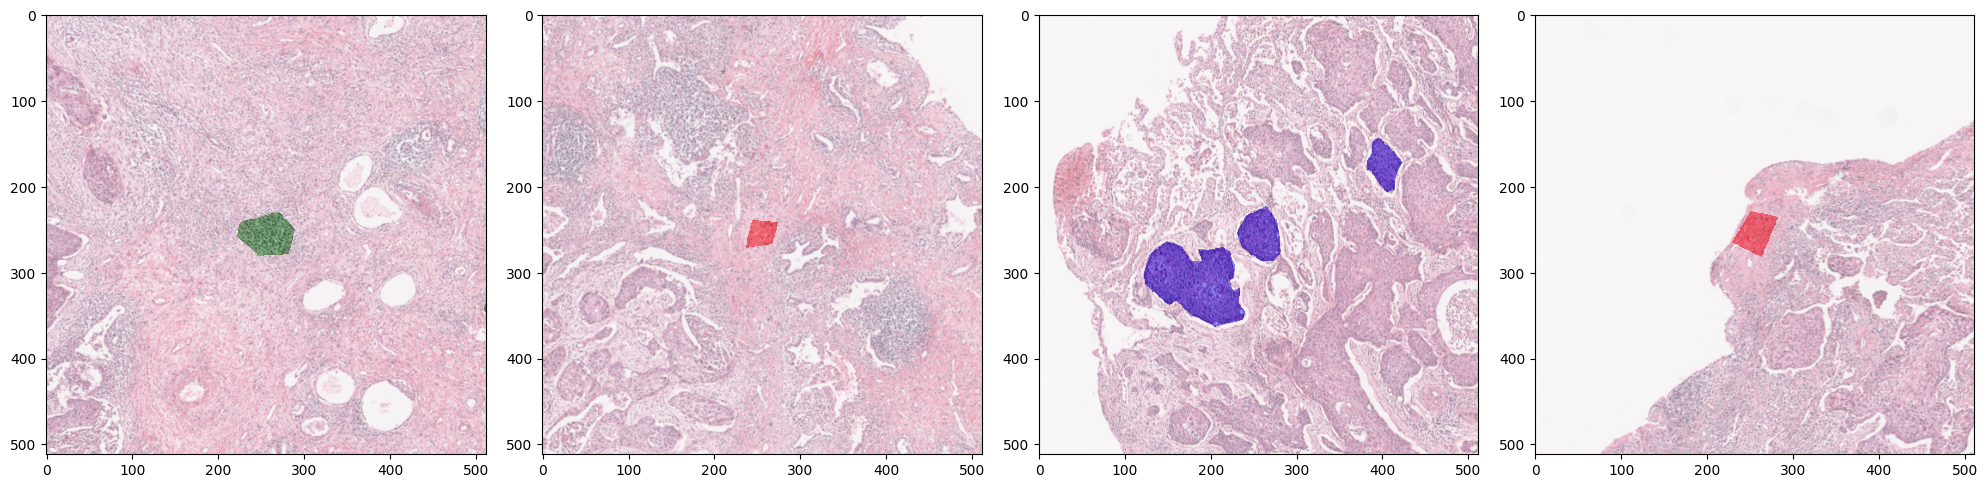

In [18]:
with create_batch_iterator(user_config=user_config, 
                            mode=mode) as training_batch_generator:
    x_batch, y_batch, info = next(training_batch_generator)
    
    # plot high-resolution batch (0.5)
    plot_batch(x_batch[:, 0, ...], y_batch[:, 0, ...]) 
    
    # plot low-resolution batch (4.0)
    plot_batch(x_batch[: ,1, ...], y_batch[:, 1, ...])